<a href="https://colab.research.google.com/github/NikolaiZolotykh/MachineLearningCourse/blob/master/VADII_06_%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%81%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# **Оценка стоимости квартиры**


# 1. Загружаем данные

Загружаем файл из интернета:

In [2]:
url = "https://raw.githubusercontent.com/NikolaiZolotykh/MachineLearningCourse/master/flats.csv"
data_raw = pd.read_csv(url)

Точно так же можно загрузить файл с локального диска, только вместо `url` надо указать путь. Однако если вы пользуетесь colab, то чтобы загрузить файл с локального диска придется поступить по-другому:

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
#import io
#data_raw = pd.read_csv(io.BytesIO(uploaded['flats.csv']))

Таблица содержит данные о более 72 тысяч квартир, выставленных на продажу в г.Нижнем Новгороде в 2017 г. Для каждой квартиры указаны ее цена (в тыс. руб.), географические координаты, тип продажи (вторичка или новостройка), количество этажей, тип дома, количество комнат (0 - квартира-студия), номер этажа и общая площадь квартиры (в кв.м).

Вначале посмотрим на размеры таблицы: количество строк (каждая строка соответствует одной квартире) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [5]:
data_raw.shape

(72379, 10)

In [6]:
data_raw

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
0,3500.000,240,56.365696,43.820250,Resale,9.0,Brick,3.0,4.0,60.0
1,4000.000,240,56.323057,44.007862,Resale,3.0,Brick,3.0,3.0,57.0
2,2150.000,240,56.267552,43.892107,Resale,5.0,Panel,2.0,1.0,38.0
3,3100.000,240,56.359963,43.813756,Resale,5.0,Panel,4.0,2.0,59.0
4,3585.000,240,56.325374,43.937463,Resale,9.0,Panel,2.0,7.0,52.5
...,...,...,...,...,...,...,...,...,...,...
72374,3250.000,372,56.282006,44.085056,Resale,14.0,Monolithic,1.0,1.0,44.7
72375,2824.800,371,56.348480,43.873340,Resale,17.0,Brick,1.0,3.0,42.8
72376,3316.125,371,56.300964,43.951468,New,25.0,Monolithic,2.0,5.0,55.5
72377,13600.000,371,56.329327,44.014997,Resale,5.0,Brick,3.0,4.0,81.9


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [7]:
data_raw.head(15)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
0,3500.0,240,56.365696,43.820250,Resale,9.0,Brick,3.0,4.0,60.0
1,4000.0,240,56.323057,44.007862,Resale,3.0,Brick,3.0,3.0,57.0
2,2150.0,240,56.267552,43.892107,Resale,5.0,Panel,2.0,1.0,38.0
3,3100.0,240,56.359963,43.813756,Resale,5.0,Panel,4.0,2.0,59.0
4,3585.0,240,56.325374,43.937463,Resale,9.0,Panel,2.0,7.0,52.5
5,2380.0,240,56.368027,43.818317,Resale,9.0,Brick,2.0,7.0,46.0
6,38500.0,240,56.317963,44.063230,Resale,25.0,Brick,5.0,22.0,313.0
7,1500.0,241,56.346896,43.802428,Resale,5.0,Panel,1.0,2.0,28.0
8,1669.0,240,56.283915,44.082083,New,7.0,Block,1.0,5.0,33.0
9,3800.0,240,56.366988,43.809653,New,14.0,Monolithic,2.0,2.0,73.0


А вот последние строки:

In [8]:
data_raw.tail()

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
72374,3250.000,372,56.282006,44.085056,Resale,14.0,Monolithic,1.0,1.0,44.7
72375,2824.800,371,56.348480,43.873340,Resale,17.0,Brick,1.0,3.0,42.8
72376,3316.125,371,56.300964,43.951468,New,25.0,Monolithic,2.0,5.0,55.5
72377,13600.000,371,56.329327,44.014997,Resale,5.0,Brick,3.0,4.0,81.9
72378,1490.000,372,56.323293,43.868697,Resale,2.0,Brick,2.0,2.0,46.0


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72379 entries, 0 to 72378
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     72379 non-null  float64
 1   Date      72379 non-null  int64  
 2   Lat       72379 non-null  float64
 3   Lng       72379 non-null  float64
 4   Type      72362 non-null  object 
 5   Floors    72362 non-null  float64
 6   Building  72362 non-null  object 
 7   Rooms     72362 non-null  float64
 8   Floor     72362 non-null  float64
 9   Area      72362 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.5+ MB


Мы видим, что столбцы (признаки) имеют имена

- `Price` - цена (в тыс. руб.)
- `Date` - номер дня, в который квартира была выставлена на продажу
- `Lat` - географическая широта объекта
- `Lng` - географическая долгота объекта
- `Type` - тип продажи (`'Resale'` - вторичка, `'New'` - новостройка)
- `Floors` - количество этажей в доме
- `Building` - тип строения (`'Brick'`, `'Panel'`, `'Monolithic'`, `'Block'`, `'Wooden'`)
- `Rooms` - количество комнат в квартире (0 - квартира-студия)
- `Floor` - номер этажа
- `Area` - общая площадь квартиры (в кв.м)

Признак `Building` - номинальный (категориальный), `Type` - бинарный, остальные признаки (включая целевой признак `Price`) - количественный (числовой).

Требуется предсказать количественный признак `Price` по остальным признакам. Это *задача восстановления регрессии*.

Типы признаков:

- Качественные (*категориальные*, *факторные*):
  - Неупорядоченные (*номинальные*)
  - Упорядоченные (*порядковые*)
- Количественные (*числовые*):
  - *Непрерывные*
  - *Дискретные*

*Бинарные* признаки (которые принимают только два значения) можно считать и номинальными, и порядковыми, и дискретными    

Столбцы `'Building'` и `'Type'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [10]:
data_raw['Type'] = data_raw['Type'].astype('category')
data_raw['Building'] = data_raw['Building'].astype('category')

In [11]:
data_raw['Type'].dtype

CategoricalDtype(categories=['New', 'Resale'], ordered=False)

In [12]:
data_raw['Building'].dtype

CategoricalDtype(categories=['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden'], ordered=False)

Информация о числовых признаках:

In [13]:
data_raw.describe()

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
count,7.237900e+04,72379.000000,72379.000000,72379.000000,72362.000000,72362.000000,72362.000000,72362.000000
mean,3.441483e+03,264.179734,56.295150,43.935564,9.373967,1.952848,5.175728,53.323833
std,9.067804e+03,87.866132,0.045418,0.082768,5.139369,0.930402,3.884019,31.438198
min,1.000000e-03,56.000000,54.862751,41.806470,1.000000,0.000000,1.000000,1.000000
25%,2.200000e+03,189.000000,56.265067,43.868633,5.000000,1.000000,2.000000,37.000000
50%,2.850000e+03,294.000000,56.300760,43.932064,9.000000,2.000000,4.000000,46.000000
75%,3.860000e+03,344.000000,56.325305,44.005985,12.000000,3.000000,7.000000,63.000000
max,2.300000e+06,372.000000,57.127867,44.485489,25.000000,6.000000,25.000000,5039.000000


Информация о категориальных признаках

In [14]:
data_raw.describe(include=['category'])

,Type,Building
count,72362,72362
unique,2,5
top,Resale,Brick
freq,64165,53263


Имена столбцов (признаков) можно получить таким образом:

In [15]:
data_raw.columns

Index(['Price', 'Date', 'Lat', 'Lng', 'Type', 'Floors', 'Building', 'Rooms',
       'Floor', 'Area'],
      dtype='object')

Имена строк (совпадают с номерами):

In [16]:
data_raw.index

RangeIndex(start=0, stop=72379, step=1)

Столбцы `'Building'` и `'Type'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [17]:
data_raw['Building']

0             Brick
1             Brick
2             Panel
3             Panel
4             Panel
            ...    
72374    Monolithic
72375         Brick
72376    Monolithic
72377         Brick
72378         Brick
Name: Building, Length: 72379, dtype: category
Categories (5, object): ['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden']

Pandas реализует 2 основных класса: `Series`, `DataFrame`

In [18]:
data_raw['Building'].dtype

CategoricalDtype(categories=['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden'], ordered=False)

## Пропущенные значения:

In [19]:
data_raw.isnull().sum()

Price        0
Date         0
Lat          0
Lng          0
Type        17
Floors      17
Building    17
Rooms       17
Floor       17
Area        17
dtype: int64

In [20]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 1]

['Type', 'Floors', 'Building', 'Rooms', 'Floor', 'Area']

Строки с пропущенными значеними можно удалить (так как их немного):

In [21]:
#data_raw = data_raw.dropna()

Мы потом будем использовать чуть более продвинутый метод.

## 2. Визуализируем, анализируем, боремся с выбросами (outliers)

Понятно, что цена квартиры в первую очередь зависит от ее площади.
Построим поэтому диаграмму рассеивания для двух признаков: `Price` и `Area`.


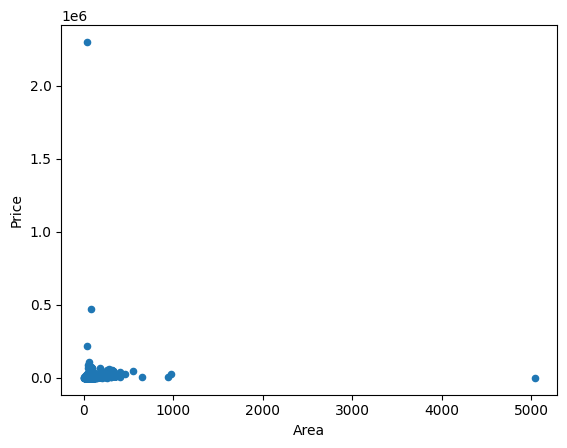

In [22]:
data_raw.plot(kind='scatter', x='Area', y='Price')
pass

Можно вот так:

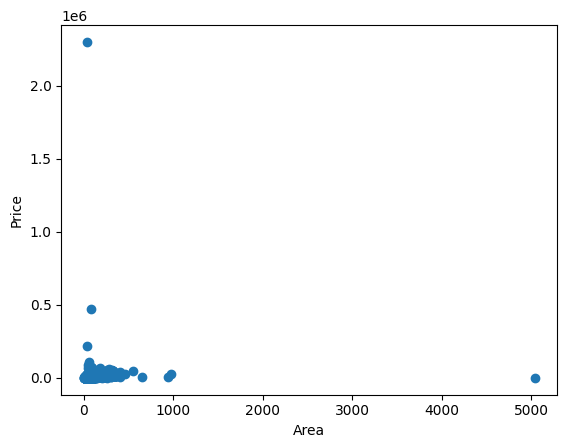

In [23]:
plt.scatter(data_raw['Area'], data_raw['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
pass

Все диаграммы рассеивания:

In [ ]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

In [ ]:
data_raw[data_raw['Price'] > 50000]

In [ ]:
data_raw[data_raw['Area'] > 300]

Мы видим, что на диаграмме рассеивания `Price`-`Area` основная масса точек сгрудилась в левом нижнем углу. Какие-то точки соответствуют квартирам с чрезмерно большими значениями цены или площади. Например, более $2$ млрд. руб. или $5$ тыс м. Это *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квантили для признаков `Price` и `Area`:

In [ ]:
data_raw['Price'].plot(kind='box')
pass

In [ ]:
data_raw['Area'].plot(kind='box')
pass

In [ ]:
data_raw['Price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

Мы видим, например, что $99\%$ всех значений признака `'Price'` находится в диапазоне от $800$ до $14900$ тыс. руб. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

In [ ]:
data_raw['Area'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

$99\%$ всех значений `'Area'` находится в диапазоне от $18$ до $162$ кв. м.

Удалим все строки таблицы, в которых `'Price'` или `'Area'` выходят за пределы квантилей $0.005$, $0.995$.

In [ ]:
rows_to_drop = data_raw[
    (data_raw['Price'] < data_raw['Price'].quantile(0.005)) | (data_raw['Price'] > data_raw['Price'].quantile(0.995)) |
    (data_raw['Area']  < data_raw['Area' ].quantile(0.005)) | (data_raw['Area']  > data_raw['Area' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

In [ ]:
#Другой способ:
data = data_raw[
    (data_raw['Price'] >= data_raw['Price'].quantile(0.005)) & (data_raw['Price'] <= data_raw['Price'].quantile(0.995)) &
    (data_raw['Area']  >= data_raw['Area' ].quantile(0.005)) & (data_raw['Area']  <= data_raw['Area' ].quantile(0.995))]
data.shape

In [ ]:
data['Price'].plot(kind='box')
pass

In [ ]:
data['Area'].plot(kind='box')
pass

Другой способ обнаружения выбросов. Можно воспользоваться эвристическим правилом, что все примеры за границами интервала $[Q_1-1.5\cdot{\rm IQR},\, Q_3+1.5\cdot{\rm IQR}]$ являются выбросами.

In [ ]:
Q1, Q3 = data_raw['Price'].quantile([.25, .75])
IQR = Q3 - Q1
price_lower = Q1 - 1.5*IQR
price_upper = Q3 + 1.5*IQR

In [ ]:
Q1, Q3 = data_raw['Area'].quantile([.25, .75])
IQR = Q3 - Q1
area_lower = Q1 - 1.5*IQR
area_upper = Q3 + 1.5*IQR

In [ ]:
rows_to_drop = data_raw[
    (data_raw['Price'] < price_lower) | (data_raw['Price'] > price_upper) |
    (data_raw['Area']  < area_lower)  | (data_raw['Area']  > area_upper)].index
data = data_raw.drop(rows_to_drop)
data.shape


In [ ]:
data['Price'].plot(kind='box')
pass

In [ ]:
data['Area'].plot(kind='box')
pass

In [ ]:
data.describe()

In [ ]:
data.describe(include=['category'])

In [ ]:
data.plot(kind = 'scatter', x = 'Area', y = 'Price', alpha=.01)
pass

In [ ]:
data.plot(kind = 'scatter', x = 'Rooms', y = 'Price', alpha=0.02)
pass

In [ ]:
data.plot(kind = 'scatter', x = 'Lng', y = 'Lat', alpha=0.05)
#plt.scatter(data['Lng'], data['Lat'], alpha=0.01)
plt.xlim([43.7, 44.1])
plt.ylim([56.2, 56.4])
pass

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [ ]:
data['Type'].value_counts()

In [ ]:
sns.countplot(x='Type', data=data)
pass

In [ ]:
data['Building'].value_counts().index

In [ ]:
sns.countplot(x='Building', data=data)
pass

In [ ]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, data=data)
pass

In [ ]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, hue='Type', data=data)
pass

In [ ]:
sns.countplot(x='Type', hue='Building', data=data)
pass

Для отрисовки диаграммы рассеивания мы можем воспользоваться более продвинутой функцией `scatterplot` из модуля `seaborn`. Например, в следующей диаграмме цвет маркеров соответствует типу строения `'Building'`, а размер - количеству комнат `'Rooms'`:

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Area', y='Price', size='Rooms', hue='Building', data=data, alpha=0.1)
pass

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='Price', data=data, alpha=0.5)
plt.xlim([43.7, 44.1])
plt.ylim([56.2, 56.4])
pass

Мы видим, что наблюдается ожидаемая корреляция между количеством комнат и площадью квартиры. Также можно увидеть, что квартиры в панельных домах, как правило, имеют умеренные размеры и умеренные цены. Квартиры в монолитных домах, как правило, больше и дороже. Кирпичные дома бываю в разной ценовой категории, но самые большие и дорогие квартиры - в основном в кирпичных домах.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [ ]:
sns.pairplot(data.sample(1000), hue='Building', diag_kind='hist')
pass

На диаграммах, в частности, наблюдается попарная корреляция между `Price`, `Area` и `Rooms`.

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.

Построить гистограмму можно с помощю функции `plt.hist` или `pd.hist`, но мы воспользуемся `displot` из библиотеки `seaborn`.

In [ ]:
sns.displot(data['Price'], bins=15, kde=True)
plt.grid()
pass

Можно представить вместе и диаграмму рассеивания для пары признаков и соответствующие гистограммы:

In [ ]:
sns.jointplot(x='Area', y='Price', alpha=.05, data=data)
pass

In [ ]:
sns.displot(data['Area'], bins = 20, kde=True)
pass

In [ ]:
sns.displot(data['Date'], bins = 15, kde=True)
pass

*Ящик с усами* (*бокс-диаграмма*) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

In [ ]:
sns.boxplot(x="Building", y="Price", data=data)
pass

In [ ]:
sns.boxplot(x="Building", y="Area", hue="Type", data=data)
pass

Также информацию о характере распределения можно получить из *скрипичных графиков* (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

In [ ]:
sns.violinplot(x="Building", y="Price", data=data)
pass

In [ ]:
sns.violinplot(x="Building", y="Price", hue="Type", split=True, data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [ ]:
corr_mat = data.corr(numeric_only=True)
corr_mat

Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

In [ ]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

In [ ]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [ ]:
corr_mat > 0.5

In [ ]:
np.triu(corr_mat, k=1)

In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

In [ ]:
corr_mat.where(np.triu(np.abs(corr_mat) > 0.5, k=1)).stack().sort_values(ascending=False)

Достаточно большие значения этих коэффициентов вполне объяснимы.

Обратите внимание на небольшую корреляцию между ценой квартиры и географическими координатами (квартиры в нагорной части и особенно в нижегородском районе - дороже):

In [ ]:
corr_mat.loc['Price', 'Lng'], corr_mat.loc['Price', 'Lat']

Также обратите внимание, что коэффициент корреляции между `'Price'`, `'Date'` практически равен нулю

In [ ]:
corr_mat.loc['Price', 'Date']

Например, выберем все данные, соответствующие квартирам в деревянных строениях ценой больше 3 млн. и выше:

In [ ]:
data.loc[(data['Building']=='Wooden') & (data['Price'] >= 3000), :]

Или все данные, соответствующие продажам в деревянных новостройках:

In [ ]:
data.loc[(data['Building']=='Wooden') & (data['Type']=='New'), :]

Значения, которые принимают категориальные признаки, можно получить следующим образом:

In [ ]:
data['Type'].unique()

In [ ]:
data['Building'].unique()

## 2. Борьба с выбросами



In [ ]:
data_raw.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995], numeric_only=True)

Мы видим, например, что $99\%$ всех значений признака `'Price'` находится в диапазоне от $800$ до $14967$ тыс. руб. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

$99\%$ всех значений `'Area'` находится в диапазоне от $18$ до $162$ кв. м.

Удалим все строки таблицы, в которых `'Price'` или `'Area'` выходят за пределы квантилей $0.005$, $0.995$.

In [ ]:
rows_to_drop = data_raw[
    (data_raw['Price'] < data_raw['Price'].quantile(0.005)) | (data_raw['Price'] > data_raw['Price'].quantile(0.995)) |
    (data_raw['Area'] < data_raw['Area'].quantile(0.005)) | (data_raw['Area'] > data_raw['Area'].quantile(0.995))].index
data_raw = data_raw.drop(rows_to_drop)

In [ ]:
data_raw.describe()

In [ ]:
data_raw.describe(include='category')

## 3. Обучающая и тестовая выборки

Для предсказания цены квартиры будем использовать все входные признаки, кроме `Date`.

In [ ]:
X = data_raw.drop(['Price', 'Date'], axis=1)
y = data_raw['Price']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

##  4. Заполнение пропущенных значений

Пропущенные значения в таблице представлены значениями `np.nan`.
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:
`na` - not available

In [ ]:
X_train.isna().sum()

In [ ]:
X_test.isna().sum()

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями. В нашем случае это разумно, так как таких строк немного. В некоторых случаях можно удалить столбцы с пропущенными значениями. Однако если данных мало такие простые стратегии могут привести к тому, что данных станет вообще ничтожное количество.

Простая разумная стратегия - заполнить пропущенные значения медианой или средним (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [ ]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_train[['Floors', 'Rooms', 'Floor', 'Area']])

In [ ]:
X_train[['Floors', 'Rooms', 'Floor', 'Area']] = imp_num.transform(X_train[['Floors', 'Rooms', 'Floor', 'Area']])

Заполним наиболее частыми значения в столбцах, соответствующих категориальным признакам/ Еще можно ввести новый признак - индикатор пропущенного значения (легко сделать при бинаризации ниже).

In [ ]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_train[['Type', 'Building']])

In [ ]:
X_train[['Type', 'Building']] = imp_cat.transform(X_train[['Type', 'Building']])

In [ ]:
X_train.isna().sum()

## 5. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Бинарный признак `'Type'` заменим на числовой.

`'Resale'` → 0, `'New'`→ 1

К категориальному (небинарному) признаку `'Building'` применим метод *бинаризации* (*one-hot encoding*),
который заключается в следующем.

Этот признак принимает 5 значений: `'Block'`, `'Brick'`, `'Monolithic'`, `'Panel'`, `'Wooden'`.

Вместо признака `'Building'` будем использовать 5 новых признаков (dummy-признаков, dummy - фиктивный), которые так и назовем `'Building_Block'`, `'Building_Brick'`, `'Building_Monolithic'`, `'Building_Panel'`, `'Building_Wooden'`. При этом
- если признак `'Building'` принимает значение `'Block'`, то признак `'Building_Block'` равен 1, а все остальные 0;
- если признак `'Building'` принимает значение `'Brick'`, то признак `'Building_Brick'` равен 1, а все остальные 0
- и т.д.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['Type', 'Building']])

In [ ]:
dummies = pd.DataFrame(enc.transform(X_train[['Type', 'Building']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

Добавим эти dummy-столбцы к таблице и удалим столбцы `Type`, `Building`:

In [ ]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['Type', 'Building'], axis=1)

In [ ]:
X_train.head()

## 6. Масштабирование количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из трех следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению;
- *нормализация* - приведение данных к единичной норме.

Выполним стандартизацию всех признаков:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [ ]:
X_train.describe()

# 7. Обучаем модель

## Линейная регрессия

- Создаем модель и задаем гиперпараметры (конструктор)
- Тренируем модель (метод `fit`)
- Используем модель на новых данных (метод `predict`) и измеряем качество модели

Ищем коэффициенты (веса) $\beta_0, \beta_1, \dots, \beta_d$ _линейной модели_
$$
f(x) = \beta_0 + \sum_{j=1}^d \beta_j x_j,
$$
минимизирующие остаточную сумму квадратов
$$
{\rm RSS} = \sum_{i=1}^N \left(f(x^{(i)}) - y^{(i)}\right)^2
$$

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)

In [ ]:
model.coef_

In [ ]:
y_train

In [ ]:
y_train_predict

In [ ]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

# 8.Тестируем модель

Мы сделали много преобразований с `X_train`. Чтобы нашу модель опробовать на `X_test`, надо вначале с `X_test` выполнить те же преобразования.  

In [ ]:
# Заполнение пропущенных значений:
X_test[['Floors', 'Rooms', 'Floor', 'Area']] = imp_num.transform(
    X_test[['Floors', 'Rooms', 'Floor', 'Area']])
X_test[['Type', 'Building']] = imp_cat.transform(X_test[['Type', 'Building']])

# One-hot encoding:
dummies = pd.DataFrame(enc.transform(X_test[['Type', 'Building']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['Type', 'Building'], axis=1)

# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

### Измеряем метрики качества

*Остаточная сумма квадратов* (*residual sum of squares*):
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

*Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


*Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

*Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

*Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

*Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

Для вычисления этих метрик можно воспользоваться соответствующими функциями из модуля `metrics` библиотеки `sklearn`, но можно также вычислить "вручную". Значение $R^2$ также вычисляет метод `score` объекта `LinearRegression`

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

In [ ]:
model.score(X_train, y_train) # Коэффициент детерминации R^2

In [ ]:
model.score(X_test, y_test)

In [ ]:
#MSE_train = np.mean((y_train_predict - y_train)**2)
#MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

In [ ]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

In [ ]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [ ]:
RMSE_table

In [ ]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

### Если предсказывать цену только по площади квартиры?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Area`

In [ ]:
model = LinearRegression()
model.fit(X_train[['Area']], y_train)

y_train_predict = model.predict(X_train[['Area']])
y_test_predict  = model.predict(X_test[['Area']])

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [ ]:
RMSE_table.loc['Linear Regression, Area', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Area', :] = (R2_train, R2_test)
R2_table

### Как цена зависит от количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Rooms`

In [ ]:
model = LinearRegression()
model.fit(X_train[['Rooms']], y_train)

y_train_predict = model.predict(X_train[['Rooms']])
y_test_predict  = model.predict(X_test[['Rooms']])

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [ ]:
RMSE_table.loc['Linear Regression, Rooms', :] = (RMSE_train, RMSE_test)
RMSE_table

Ошибка заметно возросла

In [ ]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Rooms', :] = (R2_train, R2_test)
R2_table

### Как цена зависит от площади и количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` от `Area` и `Rooms`

In [ ]:
model = LinearRegression()
model.fit(X_train[['Area', 'Rooms']], y_train)

y_train_predict = model.predict(X_train[['Area', 'Rooms']])
y_test_predict  = model.predict(X_test[['Area', 'Rooms']])

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [ ]:
RMSE_table.loc['Linear Regression, Area & Rooms', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Area & Rooms', :] = (R2_train, R2_test)
R2_table

## 9.1 Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

## 9.2 Полносвязная нейронная сеть (Full-connected Neural Network)

Full connected neural network, or multi-layer perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(20,10))
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['Neural Network', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_table.loc['Neural Network', :] = (R2_train, R2_test)
R2_table

## 9.3 Случайный лес (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

Метод Random Forest позволяет получить некоторые оценки "*важности*" признаков.
Чем значение больше, тем признак важнее.

In [ ]:
importances = model.feature_importances_
importances

In [ ]:
np.sum(importances)

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

In [ ]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## 9.4 Градиентный бустинг (Gradient Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['Gradient Boosting', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_table.loc['Gradient Boosting', :] = (R2_train, R2_test)
R2_table

In [ ]:
importances = model.feature_importances_
importances

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

In [ ]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

# 10. Использование Pipeline

`Pipeline` - удобный инструмент, позволяющий соединять вместе предобработку и основные методы модели

In [ ]:
X = data_raw.drop(['Price'], axis=1)
y = data_raw['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

In [ ]:
!pip install feature_engine
from feature_engine.selection import DropFeatures

## 10.1 Линейная регрессия

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Добавляем новые признаки:
    ('poly_feature', PolynomialFeatures(degree=3)),
    # Обучение:
    ('fit', LinearRegression())
])

In [ ]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## 10.2 *k*NN

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', KNeighborsRegressor())
])

## Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

k_arr = np.array([1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50])

params = {
    'fit__n_neighbors': k_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

In [ ]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')
pass

Теперь обучим модель при найденом оптимальном значении гиперпараметра:

In [ ]:
ppl.set_params(fit__n_neighbors=model.best_params_['fit__n_neighbors'])
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## 10.3 Random Forests

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', RandomForestRegressor())
])


In [ ]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## **Сводка метрик качества в задачах регрессии**

*Средняя сумма квадратов отклонений* (MSE — Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)}) \right)^2
$$

*Среднеквадратическая ошибка* (RMSE — Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

*Cредняя абсолютная ошибка* (MAE — Mean Absolute Error)
$$
{\rm MAE} = \frac{1}{N} \sum_{i=1}^N \left|y^{(i)} - f(x^{(i)}) \right|
$$

*Коэффициент детерминации (Пирсона)*
$$
R^2 = 1 - \frac{\sum_{i=1}^N \left(y^{(i)} - f(x^{(i)}) \right)^2}{\sum_{i=1}^N \left(y^{(i)} - \overline{y}\right)^2}
$$

$R^2$ — фактически это нормированная среднеквадратичная ошибка, она измеряет долю дисперсии, объясненную моделью, в общей дисперсии $y$.

*Средняя абсолютная процентная ошибка* (MAPE — Mean Absolute Percentage Error)

$$
{\rm MAPE} = 100\%\times\frac{1}{N} \sum_{i=1}^N \frac{\left|y^{(i)} - f(x^{(i)}) \right|}{|y^{(i)}|}
$$

*Cимметричная* MAPE (SMAPE — Symmetric MAPE)

$$
{\rm SMAPE} = 100\%\times\frac{1}{N} \sum_{i=1}^N \frac{2\times\left|y^{(i)} - f(x^{(i)}) \right|}{|y^{(i)}| + |f(x^{(i)})|}
$$